# Business Understanding

The company is expanding into new industries, including purchasing and operating airplanes for commercial and private enterprises.  The company is unfamiliar with the potential risks of different types of aircraft, so here we are looking to determine which aircraft present the lowest risk in order to begin the new business endeavor.

# Data Understanding

Here we are working with a dataset provided by the National Transportation Safety Board which includes aviation accident data from 1962 through 2003 about civil aviation accidents and selected incidents in the United States and international waters.  Every incident has a unique event ID, and the data files provide the dates and types of each event, as well as other pertinent safety information (e.g. aircraft make and model, number of injuries).

In [55]:
import pandas as pd
import numpy as np

In [56]:
data = pd.read_csv('./data/Aviation_Data.csv', low_memory=False)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [58]:
data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [59]:
data['Event Date'] = pd.to_datetime(data['Event.Date'])
data['Event Date'].describe()

<ipython-input-59-ab274c447368>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data['Event Date'].describe()


count                   88889
unique                  14782
top       1982-05-16 00:00:00
freq                       25
first     1948-10-24 00:00:00
last      2022-12-29 00:00:00
Name: Event Date, dtype: object

In [60]:
data['Make'].value_counts()

Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
CSP Leasing LLC        1
WEJEBE JOSE            1
TEW WILLIAM P          1
Dehaan                 1
Mickelson              1
Name: Make, Length: 8237, dtype: int64

In [61]:
data['Model'].value_counts()

152              2367
172              1756
172N             1164
PA-28-140         932
150               829
                 ... 
THORP T18CWS        1
185FII              1
Quickie 2           1
737-3S3             1
MURPHY SPIRIT       1
Name: Model, Length: 12318, dtype: int64

In [62]:
data['Injury.Severity'].value_counts()

Non-Fatal     67357
Fatal(1)       6167
Fatal          5262
Fatal(2)       3711
Incident       2219
              ...  
Fatal(156)        1
Fatal(114)        1
Fatal(199)        1
Fatal(21)         1
Fatal(80)         1
Name: Injury.Severity, Length: 109, dtype: int64

In [63]:
data['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

In [64]:
data['Investigation.Type'].value_counts()

Accident      85015
Incident       3874
25-09-2020      702
26-09-2020       60
02-02-2021       39
              ...  
11-02-2021        1
05-01-2021        1
05-08-2022        1
04-03-2021        1
13-09-2021        1
Name: Investigation.Type, Length: 71, dtype: int64

In [65]:
data['Aircraft.Category'].value_counts()

Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [66]:
data['Amateur.Built'].value_counts()

No     80312
Yes     8475
Name: Amateur.Built, dtype: int64

In [67]:
data['FAR.Description'].value_counts()

091                               18221
Part 91: General Aviation          6486
NUSN                               1584
NUSC                               1013
137                                1010
135                                 746
121                                 679
Part 137: Agricultural              437
UNK                                 371
Part 135: Air Taxi & Commuter       298
PUBU                                253
129                                 246
Part 121: Air Carrier               165
133                                 107
Part 129: Foreign                   100
Non-U.S., Non-Commercial             97
Non-U.S., Commercial                 93
Part 133: Rotorcraft Ext. Load       32
Unknown                              22
Public Use                           19
091K                                 14
ARMF                                  8
Part 125: 20+ Pax,6000+ lbs           5
125                                   5
107                                   4


In [68]:
data['Schedule'].value_counts()

NSCH    4474
UNK     4099
SCHD    4009
Name: Schedule, dtype: int64

In [69]:
data['Report.Status'].value_counts()

Probable Cause                                                                                                                                                           61754
Foreign                                                                                                                                                                   1999
<br /><br />                                                                                                                                                               167
Factual                                                                                                                                                                    145
The pilot's failure to maintain directional control during the landing roll.                                                                                                58
                                                                                                                             

In [70]:
data['Aircraft.damage'].value_counts()

Substantial    64148
Destroyed      18623
Minor           2805
Unknown          119
Name: Aircraft.damage, dtype: int64

In [71]:
data['Engine.Type'].value_counts()

Reciprocating      69530
Turbo Shaft         3609
Turbo Prop          3391
Turbo Fan           2481
Unknown             2051
Turbo Jet            703
None                  19
Geared Turbofan       12
Electric              10
NONE                   2
LR                     2
Hybrid Rocket          1
UNK                    1
Name: Engine.Type, dtype: int64

In [72]:
data['Weather.Condition'].value_counts()

VMC    77303
IMC     5976
UNK      856
Unk      262
Name: Weather.Condition, dtype: int64

In [73]:
data['Broad.phase.of.flight'].value_counts()

Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Climb           2034
Taxi            1958
Descent         1887
Go-around       1353
Standing         945
Unknown          548
Other            119
Name: Broad.phase.of.flight, dtype: int64

In [74]:
data['Number.of.Engines'].value_counts()

1.0    69582
2.0    11079
0.0     1226
3.0      483
4.0      431
8.0        3
6.0        1
Name: Number.of.Engines, dtype: int64

The dataset includes records from 1982 through 2002.  It includes a wide variety of aircraft types, makes and models.  Most injuries are non-fatal.  While some aircraft have 2+ engines, a significant majority have only one engine.  Exploring all data to help determine its relevance to the business problem.

## Data Preparation

I make the data easier to work with by dropping unnecessary columns which contain irrelevant information, as well as records/rows relating to obviously irrelevant incidents (ie. since we are interested in the safest airplanes only, we are removing ameteur built aircraft as well as things like helicopters, parachutes, etc.)

In [75]:
data.drop(columns = ['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date', 'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'Registration.Number', 'Schedule', 'Air.carrier', 'Report.Status', 'Publication.Date', 'Broad.phase.of.flight'], inplace=True)

In [76]:
data.head()

,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Event Date
0,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,UNK,1948-10-24
1,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,NaN,Personal,4.0,0.0,0.0,0.0,UNK,1962-07-19
2,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,NaN,Personal,3.0,NaN,NaN,NaN,IMC,1974-08-30
3,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,NaN,Personal,2.0,0.0,0.0,0.0,IMC,1977-06-19
4,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,1979-08-02


In [77]:
data.drop(data[data['Amateur.Built'] == 'Yes'].index, inplace=True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81873 entries, 0 to 90347
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Injury.Severity         79415 non-null  object        
 1   Aircraft.damage         77249 non-null  object        
 2   Aircraft.Category       28740 non-null  object        
 3   Make                    80366 non-null  object        
 4   Model                   80345 non-null  object        
 5   Amateur.Built           80312 non-null  object        
 6   Number.of.Engines       74626 non-null  float64       
 7   Engine.Type             73669 non-null  object        
 8   FAR.Description         28497 non-null  object        
 9   Purpose.of.flight       74278 non-null  object        
 10  Total.Fatal.Injuries    70189 non-null  float64       
 11  Total.Serious.Injuries  69239 non-null  float64       
 12  Total.Minor.Injuries    69762 non-null  float6

In [79]:
data.drop(columns = ['FAR.Description', 'Event Date'], inplace=True)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81873 entries, 0 to 90347
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         79415 non-null  object 
 1   Aircraft.damage         77249 non-null  object 
 2   Aircraft.Category       28740 non-null  object 
 3   Make                    80366 non-null  object 
 4   Model                   80345 non-null  object 
 5   Amateur.Built           80312 non-null  object 
 6   Number.of.Engines       74626 non-null  float64
 7   Engine.Type             73669 non-null  object 
 8   Purpose.of.flight       74278 non-null  object 
 9   Total.Fatal.Injuries    70189 non-null  float64
 10  Total.Serious.Injuries  69239 non-null  float64
 11  Total.Minor.Injuries    69762 non-null  float64
 12  Total.Uninjured         75457 non-null  float64
 13  Weather.Condition       76002 non-null  object 
dtypes: float64(5), object(9)
memory usage:

In [81]:
data.head()

,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK
1,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK
2,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC
3,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC
4,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC


In [82]:
values_to_remove = ['Helicopter', 'Glider', 'Balloon', 'Gyrocraft', 'Weight-Shift', 'Powered Parachute', 'Ultralight', 'WSFT', 'Powered-Lift', 'Blimp', 'Rocket', 'ULTR' ]
data = data[~data['Aircraft.Category'].isin(values_to_remove)]

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77580 entries, 0 to 90347
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         75187 non-null  object 
 1   Aircraft.damage         73132 non-null  object 
 2   Aircraft.Category       24447 non-null  object 
 3   Make                    76074 non-null  object 
 4   Model                   76052 non-null  object 
 5   Amateur.Built           76021 non-null  object 
 6   Number.of.Engines       71004 non-null  float64
 7   Engine.Type             70633 non-null  object 
 8   Purpose.of.flight       70673 non-null  object 
 9   Total.Fatal.Injuries    66396 non-null  float64
 10  Total.Serious.Injuries  65399 non-null  float64
 11  Total.Minor.Injuries    65885 non-null  float64
 12  Total.Uninjured         71329 non-null  float64
 13  Weather.Condition       72297 non-null  object 
dtypes: float64(5), object(9)
memory usage:

In [84]:
data.drop(columns = ['Aircraft.Category'], inplace=True)

In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77580 entries, 0 to 90347
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Injury.Severity         75187 non-null  object 
 1   Aircraft.damage         73132 non-null  object 
 2   Make                    76074 non-null  object 
 3   Model                   76052 non-null  object 
 4   Amateur.Built           76021 non-null  object 
 5   Number.of.Engines       71004 non-null  float64
 6   Engine.Type             70633 non-null  object 
 7   Purpose.of.flight       70673 non-null  object 
 8   Total.Fatal.Injuries    66396 non-null  float64
 9   Total.Serious.Injuries  65399 non-null  float64
 10  Total.Minor.Injuries    65885 non-null  float64
 11  Total.Uninjured         71329 non-null  float64
 12  Weather.Condition       72297 non-null  object 
dtypes: float64(5), object(8)
memory usage: 8.3+ MB


# Exploratory Data Analysis

In [88]:
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [89]:
data['Number.of.Engines'].describe()

count    71004.000000
mean         1.173610
std          0.461508
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64

AttributeError: 'numpy.ndarray' object has no attribute 'hist'

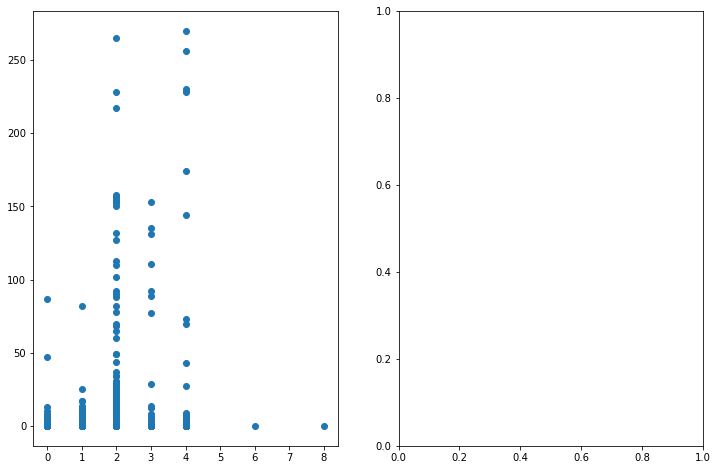

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))


ax[0].scatter(data['Number.of.Engines'], data['Total.Fatal.Injuries'])
ax.hist(data['Number.of.Engines'], bins="auto")

<function matplotlib.pyplot.show(close=None, block=None)>

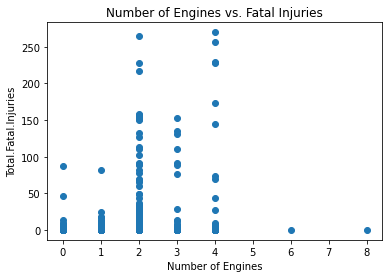

In [45]:
plt.scatter(data['Number.of.Engines'], data['Total.Fatal.Injuries'])

plt.xlabel("Number of Engines")
plt.ylabel("Total.Fatal.Injuries")
plt.title("Number of Engines vs. Fatal Injuries")

plt.show

# Conclusions

## Limitations

## Recommendations

## Next Steps